<a href="https://colab.research.google.com/github/Narasinghadev/mlproject/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
gold_dataset.shape

(2290, 6)

In [17]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
 # Checkng the number of the missing values

 gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


Finding the Correleration

In [19]:
correlation = gold_dataset.corr(numeric_only=True)

<Axes: >

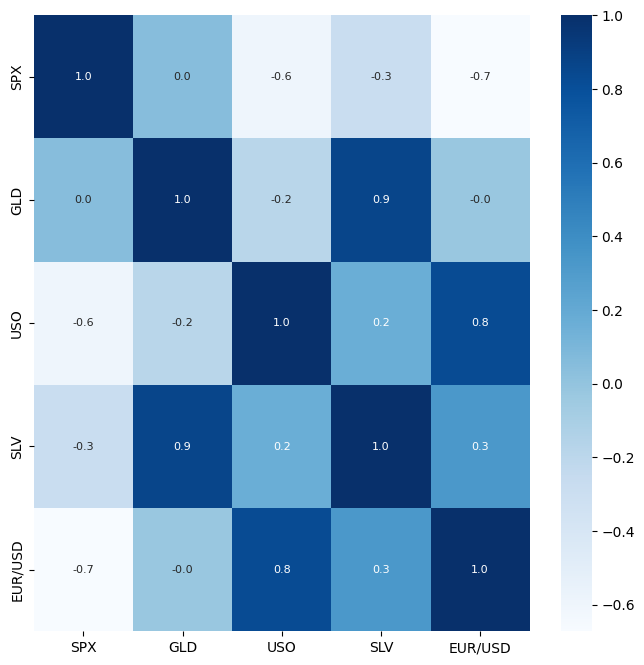

In [21]:
 # Understanding the Correlation

 plt.figure(figsize =(8,8))
 sns.heatmap(correlation, cbar= True , fmt='.1f', annot= True , annot_kws = {'size':8}, cmap= 'Blues')

<ipython-input-22-1abf30e92255>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color ='Red')


<Axes: xlabel='GLD', ylabel='Density'>

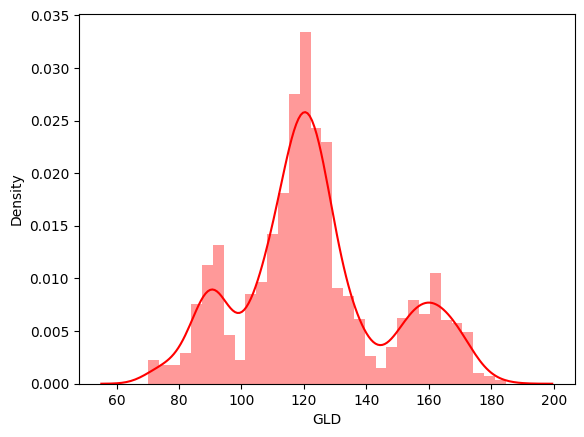

In [22]:
sns.distplot(gold_dataset['GLD'], color ='Red')

In [25]:
 # Splitting the Features and the Target

 X= gold_dataset.drop(['Date', 'GLD'] , axis =1)
 Y= gold_dataset['GLD']

In [26]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the Data into the Test and the Training Datasets

In [27]:
X_train, X_test, Y_train , Y_test =  train_test_split(X , Y , test_size= 0.2 , random_state=2)

In [29]:
X_train.shape, X_test.shape

((1832, 4), (458, 4))

Model Training : Random Forest Regressor

In [32]:
regressor  = RandomForestRegressor()

In [33]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [34]:
 # Model Evaluation

test_data_prediction = regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[168.6533998   82.15909968 115.91489963 127.59550049 120.68320127
 154.59999751 150.39489895 126.16580006 117.5158986  125.93510103
 116.70900106 171.76730118 141.57619784 167.8388986  115.03819974
 117.61490033 138.6516031  170.14860054 158.36770286 157.90299974
 155.15540033 125.1614004  176.57839977 157.61810425 125.30290035
  93.83969995  76.82420029 120.36669973 119.19209988 167.42529953
  88.19040084 124.98740008  91.24590066 117.62680029 120.93049866
 136.79830097 115.42410095 115.02950092 147.85770022 107.24710063
 104.66460248  87.12639791 126.5803009  117.92399968 152.94029862
 120.06079937 108.39410023 108.22709853  93.14030046 127.18959762
  74.69140051 113.66779928 121.53310022 111.35239879 118.89429904
 120.76099955 159.78630014 168.44160138 146.90199612  85.69749836
  94.4498001   86.80019879  90.63599991 118.80520111 126.43940057
 127.55320005 170.51479947 122.24509939 117.45969882  98.50170061
 168.72900133 142.99819829 131.9582031  121.16880231 120.92569934
 119.88400

In [36]:
 # Rsquare Error

 error_1 = metrics.r2_score(Y_test, test_data_prediction)

 print ('R square error :', error_1)

R square error : 0.98948076885896


In [39]:
 # Compare the actual values and the Predicted Value

 Y_test = list(Y_test)

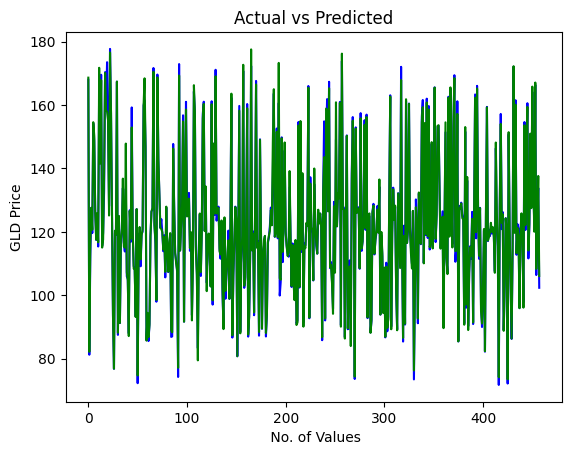

In [40]:
plt.plot(Y_test, color ='blue', label = 'Actual Values')

plt.plot(test_data_prediction, color='green', label ='Predicted Value')

plt.title('Actual vs Predicted')
plt.xlabel(' No. of Values')
plt.ylabel('GLD Price')

plt.show()